# How to Perform Feature Selection with Categorical Data

Author: Jason Brownlee

Article from [machinelearningmastery](https://machinelearningmastery.com/feature-selection-with-categorical-data/).

> Note: In this notebook, I am studying the article mentioned above. Some changes may have been made to the code during its implementation.

# Library

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# Breast Cancer Categorical Dataset

In [2]:
breast_cancer_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'

## Load the dataset as a pandas DataFrame

In [3]:
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = pd.read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y

In [4]:
X, y = load_dataset(filename=breast_cancer_url)

## Split into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## Summarize

In [6]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


## Prepare input data

In [6]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

## Prepare target

In [7]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

## Prepare input data

In [8]:
X_train_enc, X_test_enc = prepare_inputs(X_train=X_train, X_test=X_test)

## Prepare output data

In [9]:
y_train_enc, y_test_enc = prepare_targets(y_train=y_train, y_test=y_test)

## Feature selection

### Chi-Squared Statistic

In [12]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [13]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#### What are scores for the features

In [14]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


#### Plot the scores

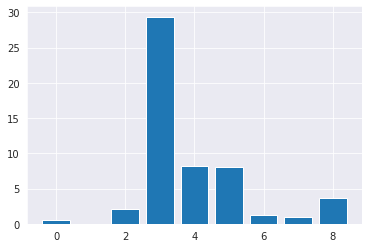

In [16]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Mutual Feature Selection

In [22]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [29]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#### What are scores for the features

In [30]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.000000
Feature 1: 0.006729
Feature 2: 0.091801
Feature 3: 0.053228
Feature 4: 0.000000
Feature 5: 0.066231
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000000


#### Plot the scores

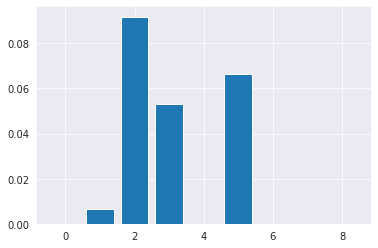

In [31]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Modeling With Selected Features

### Model Built Using All Features

#### Fit the model

In [34]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

LogisticRegression()

#### Evaluate the model

In [35]:
yhat = model.predict(X_test_enc)

#### Evaluate predictions

In [37]:
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


### Model Built Using Chi-Squared Features

In [41]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

In [42]:
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#### Fit the model

In [43]:
model.fit(X_train_fs, y_train_enc)

LogisticRegression()

#### Evaluate the model

In [44]:
yhat = model.predict(X_test_fs)

#### Evaluate predictions

In [45]:
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


### Model Built Using Mutual Information Features

In [52]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

In [57]:
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#### Fit the model

In [58]:
model.fit(X_train_fs, y_train_enc)

LogisticRegression()

#### Evaluate the model

In [59]:
yhat = model.predict(X_test_fs)

#### Evaluate predictions

In [60]:
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.89
